# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [3]:
def apply_svd_custom(X_train, X_test, n_components):
    # Step 1: Compute the covariance matrix (X.T * X)
    covariance_matrix = np.dot(X_train.T, X_train)

    # Step 2: Perform eigenvalue decomposition on the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Step 3: Sort eigenvectors by eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
    top_eigenvectors = eigenvectors[:, sorted_indices[:n_components]]  # Select top n_components

    # Step 4: Project the training data onto the new lower-dimensional subspace
    X_train_reduced = np.dot(X_train, top_eigenvectors)

    # Step 5: Apply the same transformation to the test data
    X_test_reduced = np.dot(X_test, top_eigenvectors)

    return X_train_reduced, X_test_reduced


## Part 3: Train Logistic Regression and Measure Performance

In [4]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [5]:
# Define the range of SVD components to experiment with
svd_components = [780, 500, 350, 100, 50, 10]  # You can adjust these values to explore different dimensions

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    # Store the results for future analysis
    results.append((n_components, accuracy, training_time))

    # Print the results for this number of components
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

# Now you can analyze the `results` list or plot the data in the next part


Training models with different levels of SVD preprocessing...
Applying custom SVD with 780 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 780, Accuracy: 0.9209, Training time: 892.7233 seconds
Applying custom SVD with 500 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 500, Accuracy: 0.9205, Training time: 543.0192 seconds
Applying custom SVD with 350 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 350, Accuracy: 0.9196, Training time: 352.1369 seconds
Applying custom SVD with 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 58.0260 seconds
Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9085, Training time: 17.0746 seconds
Applying custom SVD with 10 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8020, Training time: 1.9852 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


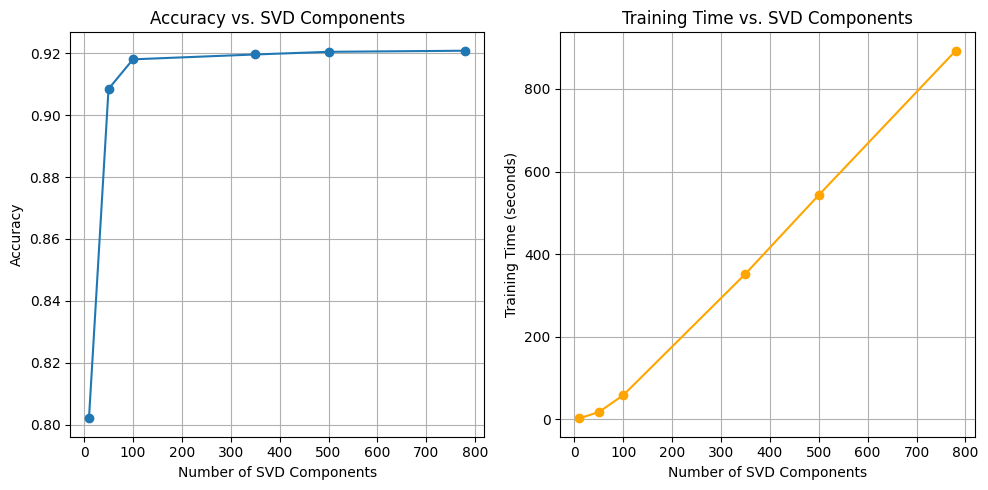

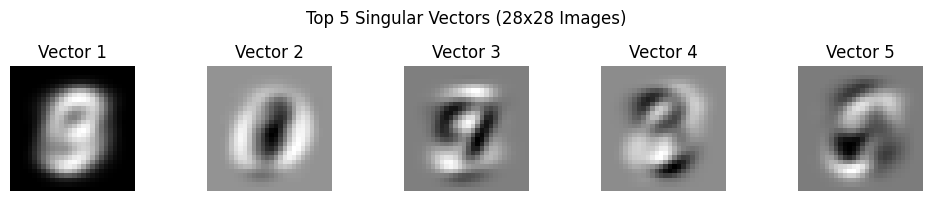

In [6]:
import matplotlib.pyplot as plt

# Part 5: Visualize and Analyze the Results
# Extract data from the results list for plotting
components = [result[0] for result in results]
accuracies = [result[1] for result in results]
training_times = [result[2] for result in results]

# Plot Accuracy vs. Number of Components
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o')
plt.title("Accuracy vs. SVD Components")
plt.xlabel("Number of SVD Components")
plt.ylabel("Accuracy")
plt.grid(True)

# Plot Training Time vs. Number of Components
plt.subplot(1, 2, 2)
plt.plot(components, training_times, marker='o', color='orange')
plt.title("Training Time vs. SVD Components")
plt.xlabel("Number of SVD Components")
plt.ylabel("Training Time (seconds)")
plt.grid(True)

plt.tight_layout()
plt.show()

# Visualize Top 5 Singular Vectors as 28x28 images
def visualize_top_singular_vectors(X_train, n_components=5):
    # Step 1: Apply full SVD to the training set
    covariance_matrix = np.dot(X_train.T, X_train)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Step 2: Sort eigenvectors by eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
    top_eigenvectors = eigenvectors[:, sorted_indices[:n_components]]  # Top 5 singular vectors

    # Step 3: Reshape each singular vector to 28x28 and plot them
    plt.figure(figsize=(10, 2))
    for i in range(n_components):
        singular_vector_image = top_eigenvectors[:, i].reshape(28, 28)
        plt.subplot(1, n_components, i + 1)
        plt.imshow(singular_vector_image, cmap='gray')
        plt.title(f"Vector {i+1}")
        plt.axis('off')

    plt.suptitle(f"Top {n_components} Singular Vectors (28x28 Images)")
    plt.tight_layout()
    plt.show()

# Visualize the top 5 singular vectors from the full dataset
visualize_top_singular_vectors(X_train)


## Part 6: Analyze / Conclusion

YOUR ANSWER: **100-350 SVD components have best balance between accuracy and computational efficiency.** Specifically, reducing the number of components to as low as 100 still provides high accuracy (~91.81%) while drastically reducing the training time from over 500 seconds to just 28 seconds. The accuracy plateaus after this point, the training time increases linearly. Overall, SVD is a powerful technique for balancing performance and efficiency, and in cases where computational resources are constrained, reducing the number of components is highly effective with minimal loss in model accuracy.
